## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd

## Data Exploration

In [45]:
#df = pd.read_csv("/content/sample_data/QueryResults_popular_programming_languauge.csv")
df = pd.read_csv('/content/sample_data/QueryResults_popular_programming_languauge.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [46]:
df.head(), df.tail()

(                  DATE       TAG  POSTS
 0  2008-07-01 00:00:00        c#      3
 1  2008-08-01 00:00:00  assembly      8
 2  2008-08-01 00:00:00         c     83
 3  2008-08-01 00:00:00        c#    505
 4  2008-08-01 00:00:00       c++    164,
                      DATE     TAG  POSTS
 2365  2022-10-01 00:00:00     php   4071
 2366  2022-10-01 00:00:00  python  24690
 2367  2022-10-01 00:00:00       r   4705
 2368  2022-10-01 00:00:00    ruby    451
 2369  2022-10-01 00:00:00   swift   1835)

In [10]:
df.shape

(2370, 3)

In [49]:
df.count() 

DATE     2370
TAG      2370
POSTS    2370
dtype: int64

In [67]:
#df.rename(columns = {'m':'DATE', 'TagName':'TAG', 'Unnamed: 2': 'POSTS'}, inplace = True)
df.groupby('TAG').sum(), df.groupby('TAG')['POSTS'].sum().max(), df.groupby('TAG')['POSTS'].sum().idxmax()


(              POSTS
 TAG                
 assembly      41426
 c            387566
 c#          1565056
 c++          779941
 delphi        50241
 go            65333
 java        1871545
 javascript  2439476
 perl          67212
 php         1448117
 python      2047690
 r            468716
 ruby         226138
 swift        320292, 2439476, 'javascript')

In [66]:
df.groupby('TAG').count(), df.groupby('TAG').count().min()

(            DATE  POSTS
 TAG                    
 assembly     171    171
 c            171    171
 c#           172    172
 c++          171    171
 delphi       171    171
 go           156    156
 java         171    171
 javascript   171    171
 perl         171    171
 php          171    171
 python       171    171
 r            169    169
 ruby         171    171
 swift        163    163, DATE     156
 POSTS    156
 dtype: int64)

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [76]:
type(df['DATE'][1])

str

In [79]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [92]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df 


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,247.0,1663.0,6076.0,3391.0,126.0,738.0,7029.0,15183.0,125.0,3840.0,22232.0,4405.0,481.0,1792.0
2022-07-01,211.0,1498.0,5969.0,3269.0,127.0,746.0,6636.0,15220.0,131.0,3789.0,22530.0,4199.0,453.0,1758.0
2022-08-01,179.0,1510.0,6367.0,3255.0,133.0,862.0,6561.0,15669.0,119.0,3795.0,22033.0,4348.0,478.0,1746.0


In [94]:
reshaped_df.shape

(172, 14)

In [97]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [103]:
reshaped_df.fillna(0, inplace=True) 

In [104]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,164.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1646.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,158.0,0.0


In [105]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


In [106]:
import matplotlib.pyplot as plt

(0.0, 35000.0)

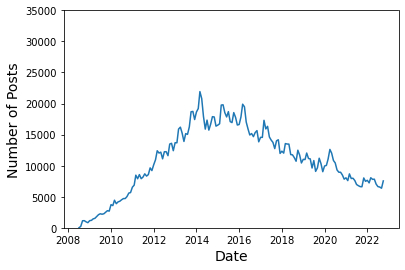

In [136]:
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


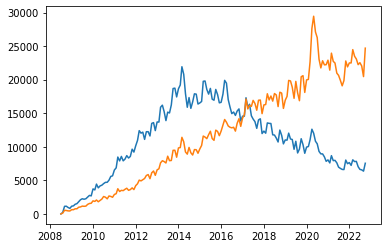

In [147]:
plt.plot(reshaped_df.index, reshaped_df['java'], reshaped_df['python'])



# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

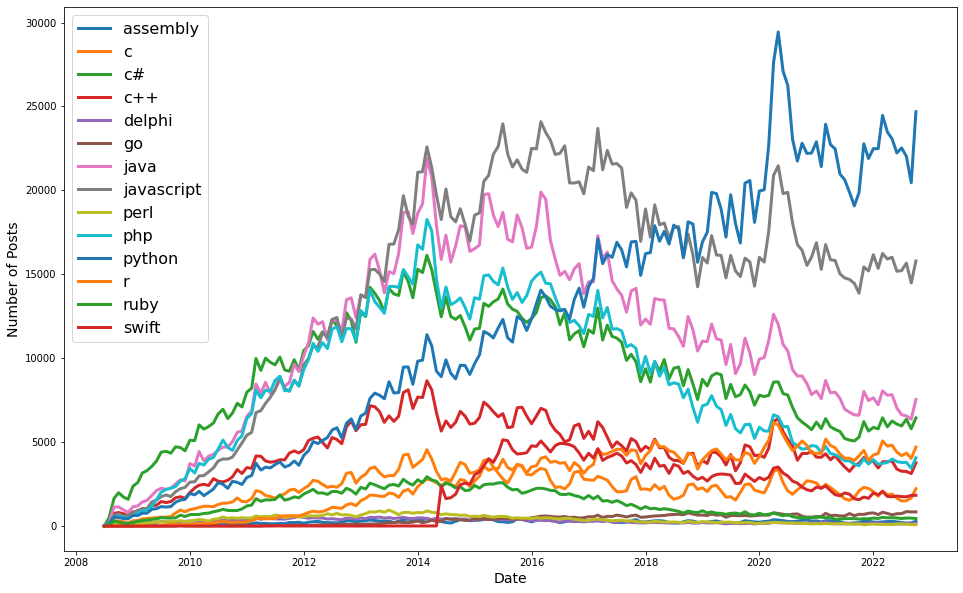

In [148]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10)) 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)
  
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.legend(fontsize=16) 